## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
%matplotlib inline

#  Import and read the charity_data.csv.
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.shape

(34299, 12)

In [3]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis = 1, inplace = True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
appType_count = application_df['APPLICATION_TYPE'].value_counts()
appType_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(appType_count[appType_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

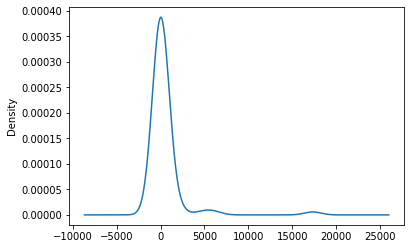

In [9]:
classification_count.plot.density()

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classfication_cutoff = classification_count[classification_count > 1]
classfication_cutoff

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
numeric_df.shape

(34299, 44)

In [14]:
# Split our preprocessed data into our features and target arrays
y = numeric_df['IS_SUCCESSFUL']
X = numeric_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [16]:
X_scaledTrain_tf = tf.convert_to_tensor(X_train_scaled)

2022-03-02 14:07:58.675707: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 14:07:58.676249: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [17]:
y_train_tf = tf.convert_to_tensor(y_train)

In [18]:
X_scaledTest_tf = tf.convert_to_tensor(X_test_scaled)

In [19]:
y_test_tf = tf.convert_to_tensor(y_test)

## Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_number = len(X_train_scaled[0])
layer_1 = 60
layer_2 = 45
# layer_3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = layer_1, input_dim = input_features_number, activation = 'tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = layer_2, activation = 'tanh'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units = layer_3, activation = "tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2640      
_________________________________________________________________
dense_1 (Dense)              (None, 45)                2745      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 46        
Total params: 5,431
Trainable params: 5,431
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
## Accuracy metric calculates how often predictions match binary labels
nn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [22]:
# Create a callback that saves the model's weights every 5 epochs
callback = tf.keras.callbacks.ModelCheckpoint(filepath = "Models/weights.{epoch:05d}.hdf5", save_freg = "epoch", period=5)

In [23]:
# Train the model
fit_model = nn.fit(X_scaledTrain_tf, y_train_tf, epochs = 100)

Train on 27439 samples
Epoch 1/100
27439/27439 [==============================] - 4s 151us/sample - loss: 0.5724 - accuracy: 0.7198
Epoch 2/100
27439/27439 [==============================] - 2s 88us/sample - loss: 0.5559 - accuracy: 0.7292
Epoch 3/100
27439/27439 [==============================] - 2s 84us/sample - loss: 0.5527 - accuracy: 0.7294
Epoch 4/100
27439/27439 [==============================] - 2s 77us/sample - loss: 0.5511 - accuracy: 0.7307
Epoch 5/100
27439/27439 [==============================] - 2s 85us/sample - loss: 0.5494 - accuracy: 0.7307
Epoch 6/100
27439/27439 [==============================] - 2s 79us/sample - loss: 0.5484 - accuracy: 0.7312
Epoch 7/100
27439/27439 [==============================] - 2s 79us/sample - loss: 0.5476 - accuracy: 0.7310
Epoch 8/100
27439/27439 [==============================] - 3s 95us/sample - loss: 0.5467 - accuracy: 0.7327
Epoch 9/100
27439/27439 [==============================] - 3s 103us/sample - loss: 0.5458 - accuracy: 0.7333
Epo

27439/27439 [==============================] - 3s 109us/sample - loss: 0.5328 - accuracy: 0.7406
Epoch 76/100
27439/27439 [==============================] - 3s 110us/sample - loss: 0.5327 - accuracy: 0.7410
Epoch 77/100
27439/27439 [==============================] - 3s 117us/sample - loss: 0.5328 - accuracy: 0.7412
Epoch 78/100
27439/27439 [==============================] - 3s 117us/sample - loss: 0.5324 - accuracy: 0.7412
Epoch 79/100
27439/27439 [==============================] - 3s 115us/sample - loss: 0.5325 - accuracy: 0.7408
Epoch 80/100
27439/27439 [==============================] - 4s 133us/sample - loss: 0.5324 - accuracy: 0.7412
Epoch 81/100
27439/27439 [==============================] - 3s 115us/sample - loss: 0.5324 - accuracy: 0.7415
Epoch 82/100
27439/27439 [==============================] - 3s 120us/sample - loss: 0.5324 - accuracy: 0.7411
Epoch 83/100
27439/27439 [==============================] - 3s 116us/sample - loss: 0.5321 - accuracy: 0.7421
Epoch 84/100
27439/2743

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_scaledTest_tf,y_test_tf,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6860/1 - 1s - loss: 0.4413 - accuracy: 0.7252
Loss: 0.5619106694317421, Accuracy: 0.725218653678894


In [25]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')